## Some Background Information


**The sinking of the RMS Titanic in the early morning of 15 April 1912, four days into the ship's maiden voyage from Southampton to New York City, was one of the deadliest peacetime maritime disasters in history, killing more than 1,500 people. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg in the North Atlantic. The ship had received six warnings of sea ice but was travelling at near maximum speed when the lookouts sighted the iceberg. Unable to turn quickly enough, the ship suffered a glancing blow that buckled the starboard (right) side and opened five of sixteen compartments to the sea. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the International Convention for the Safety of Life at Sea (1914), which continues to govern maritime safety.**  
*from Wikipedia*

**Imports**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("titanic_data.csv")

## Exploratory Data Analysis

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question**

**How many passengers are in the dataset? Are there any missing values in the dataset?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Insight**

** The dataset has 891 entries, some values for Cabin and Age are missing**

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Question**

**Of all passengers in df, how many survived?**

In [5]:
print("% of passengers survived: ", df.Survived.sum()/df.Survived.count())

% of passengers survived:  0.3838383838383838


**Add a Pie Chart with % of passengers that survived**

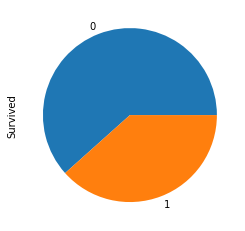

In [8]:
%matplotlib inline
import seaborn as sns
df.Survived.value_counts().plot.pie()

**Add a Bar Chart with number of passengers that survived**

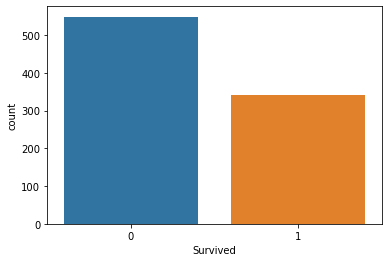

In [14]:
sns.countplot(x='Survived', data=df)

**Insight**

**More passengers died than survived**

38% survived

**Question**

**Sex: how likely are Female and Male passengers of surviving?**

In [9]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [10]:
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


**Add a [Trellis Chart](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) that compare the number of male VS female passengers that died and number of male VS female passengers that survived**

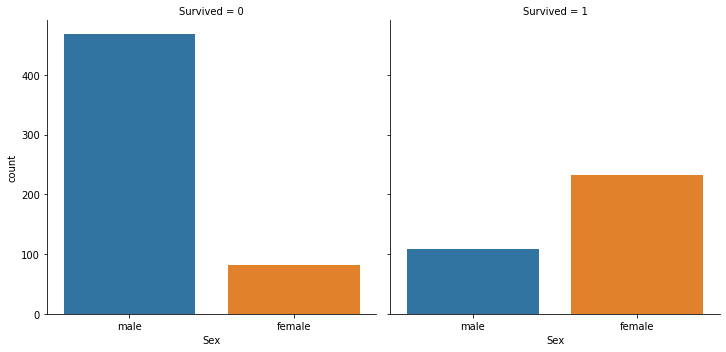

In [11]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

**Add a Pie Chart that compare the % of male VS female passengers that died and % of male VS female passengers that survived**

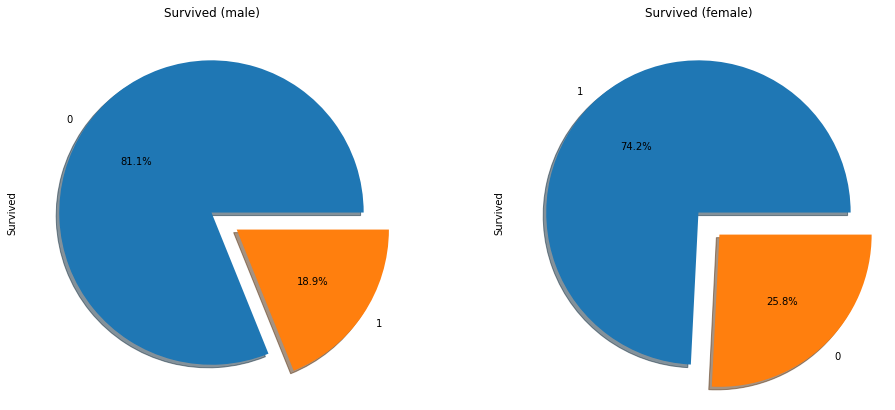

In [12]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

**Insight**

**Sex: Female are more likely to survive than male**

74 % of women survived but only 19% of men

**Question**

**Class: how likely are passengers of surviving accordingly to their class?**

In [15]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
print("% of survivals in") 
print("Pclass=1 : ", df.Survived[df.Pclass == 1].sum()/df[df.Pclass == 1].Survived.count())
print("Pclass=2 : ", df.Survived[df.Pclass == 2].sum()/df[df.Pclass == 2].Survived.count())
print("Pclass=3 : ", df.Survived[df.Pclass == 3].sum()/df[df.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


**Add a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) to visualise Survival rate according to Passenger Class**

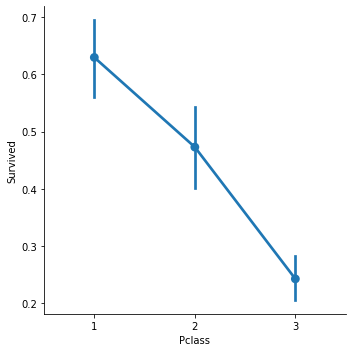

In [17]:
sns.catplot('Pclass','Survived', kind='point', data=df)

**Insight**

**Passenger Class : Survival rate decreases with Pclass**

**Question**

**How lileky are passengers to survive based on their Class and Sex?**

In [18]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

**Add a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) to visualise Survival rate according to Passenger Class with a comparaison between male and female**

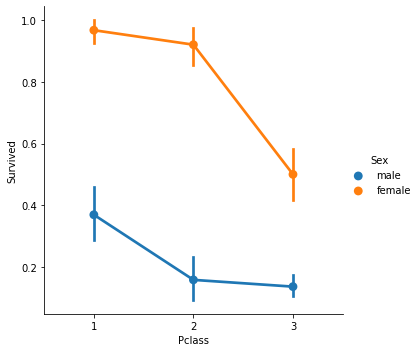

In [21]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df)

**Insight**

**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

**Question**

**How lileky are passengers to survive based on the Embarked variable?**

In [22]:
pd.crosstab(df.Embarked, df.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


**Add a [Trellis Chart](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) to visualise the number of passagers that survived according to Embarked value**

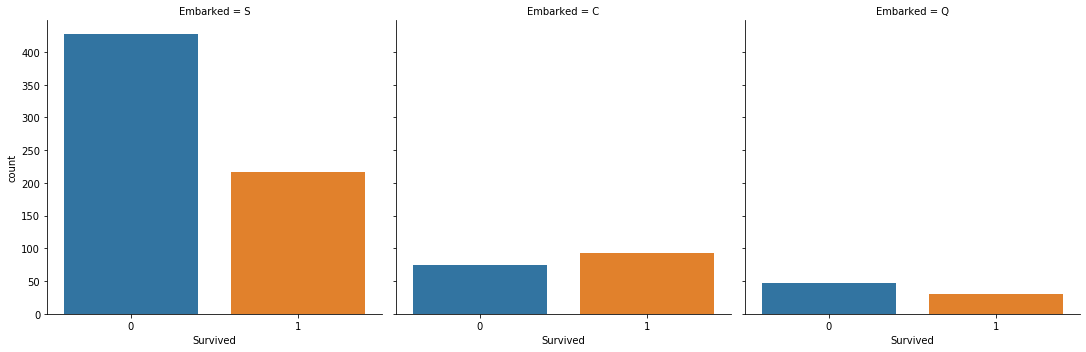

In [23]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df)

**Add a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) to visualise Survival rate according to Embarked Value**

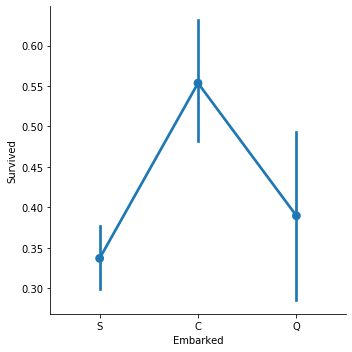

In [24]:
sns.catplot('Embarked','Survived', kind='point', data=df)

**Insight**

**Embarked : Survival rate lowest for S and highest for C**

**Question**

**How likely are passengers to survive based on the variables Embarked and Sex?**

In [25]:
pd.crosstab([df.Sex, df.Survived], df.Embarked, margins=True).style.background_gradient(cmap='autumn_r')

**Add a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) to visualise Survival rate according to Embarked Value with a comparaison between male and female**

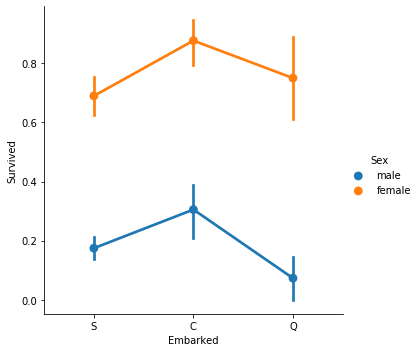

In [26]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df)

**Question**

**How likely are passengers to survive based on the variables Embarked, Pclass and Sex**

In [28]:
pd.crosstab([df.Survived], [df.Sex, df.Pclass, df.Embarked], margins=True).style.background_gradient(cmap='autumn_r')

**Add a [point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) to visualise Survival rate according to Embarked Value with a comparaison between male and female, with one plot for each Passenger class**

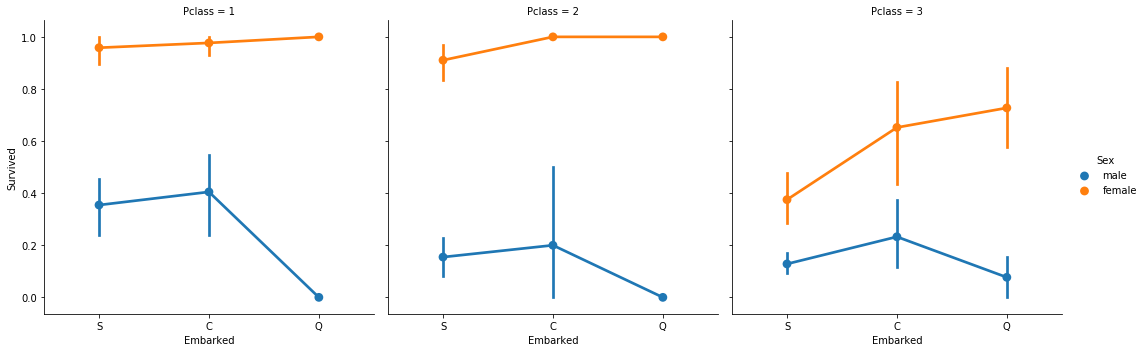

In [29]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df)

**Insight**

** Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived. **

** All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2 **

** For the remaining men in Pclass 1 that embarked in S and Q, survival rate is approx. 0.4 **